In [1]:
cd"/Users/cindyngo/Desktop/QBUS3830/Team Project"

/Users/cindyngo/Desktop/QBUS3830/Team Project


# Importing Packages & Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.despine()
sns.set_context('talk', font_scale = 1)
import statsmodels.formula.api as smf
import os

In [5]:
def InitiateData():
    '''
    Imports the data set and prepare it for EDA and modelling
    '''
    global data
    
    data = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

    col_names = ['Balance', 'Sex', 'Education', 'Marriage', 'Age',
                'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr',
                'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
                'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
                'Default']
    data.columns = col_names
    data = data.astype(str).astype(int)
    
    return data.head()

InitiateData()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,...,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning Data

## Analysis of missing data

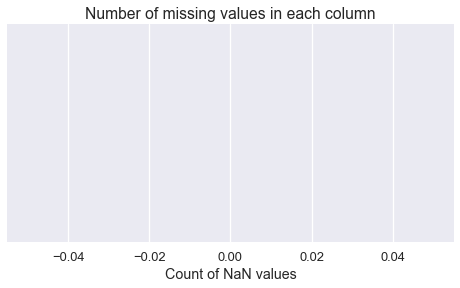

In [6]:
# Identifying missing data 
missing_data = data.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by = 'missing_count')
ind = np.arange(missing_data.shape[0])

fig, ax = plt.subplots(figsize = (8,4))
rects = ax.barh(ind, missing_data.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of NaN values")
ax.set_title("Number of missing values in each column")
plt.show()

# Exploratory Data Analysis

In [8]:
# Separation of variables into different data types
response = ['Default']

continuous = ['Balance',
              'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
              'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr']

categorical = ['Sex', 'Education', 'Marriage',
              'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr']

discrete = ['Age']

predictors = continuous + categorical + discrete

In [9]:
data.describe().round(2)

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,...,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Nothing too interesting:

* NB: 1AUD ~ 20NT
* 81 different credit balance tiers
* education has 7 unique values but only 4 in the descrption?
* marriage has 4 uniques but only 3 in description?
* age range of 56 years
* PAY (payment status): -1 means paid fully for the corresponding bill, 0 no payment (yet), 1,2,...,8 means payment late
* Current bill and previous payment - so if fully paid, a bill in August will match the payment in September

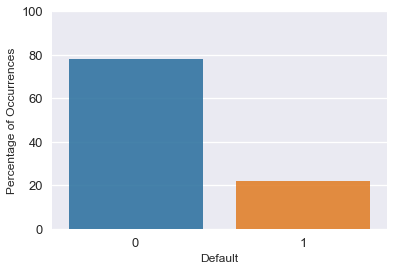

0    77.9
1    22.1
Name: Default, dtype: float64

In [19]:
# Percentage of Responses 
fig = plt.figure()
default_count = data['Default'].value_counts(normalize=True).round(3)*100
sns.barplot(default_count.index, default_count.values, alpha=0.9)
plt.ylabel('Percentage of Occurrences', fontsize=12)
plt.xlabel('Default', fontsize=12)
plt.ylim(0,100)    
plt.show()

default_count

22.1% of responses are defaults - this is an imbalanced class problem

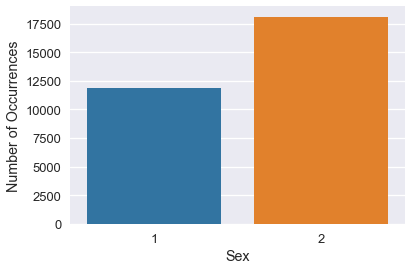

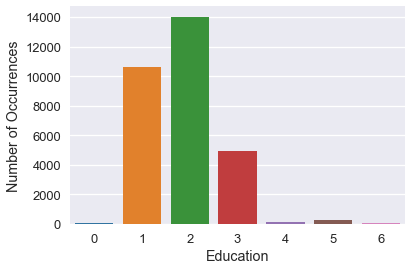

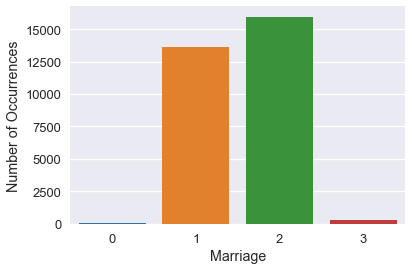

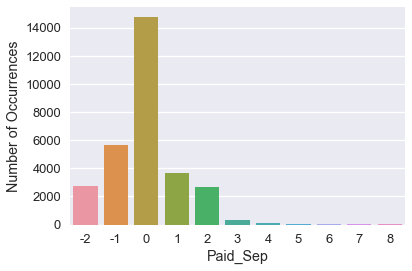

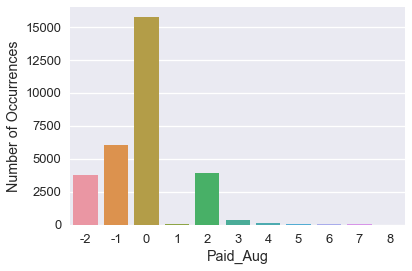

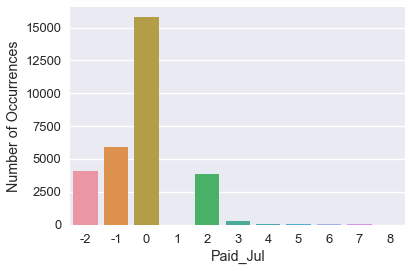

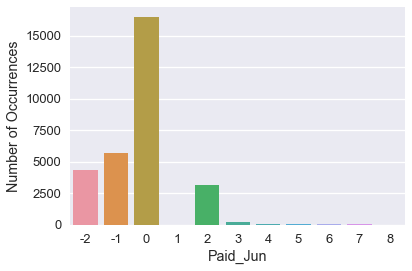

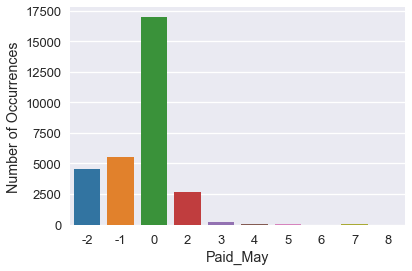

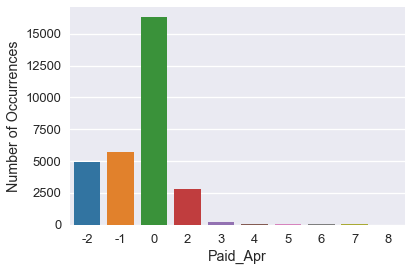

In [20]:
# Barplots for each categorical variable 
for item in categorical: 
    fig,ax = plt.subplots()
    item_count = data[item].value_counts()
    sns.barplot(item_count.index, item_count.values)
    plt.ylabel('Number of Occurrences')
    plt.xlabel(item)
    plt.show()

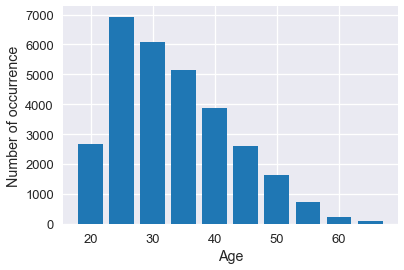

In [21]:
bins = [20,25,30,35,40,45,50,55,60,65,70]

plt.hist(data['Age'], bins, histtype='bar', rwidth=0.8, align='left', orientation='vertical')
plt.xlabel('Age')
plt.ylabel('Number of occurrence')
plt.show()

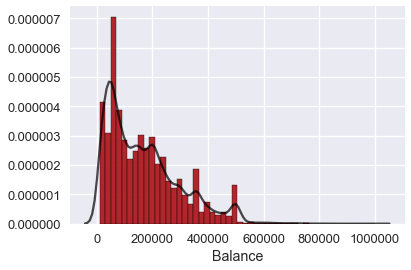

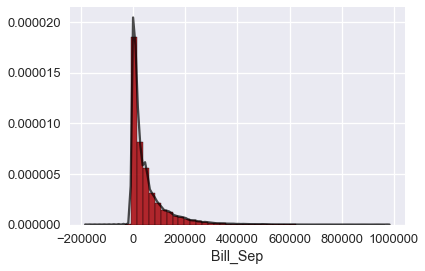

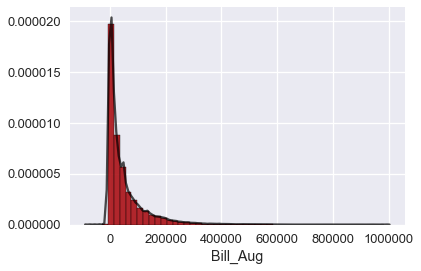

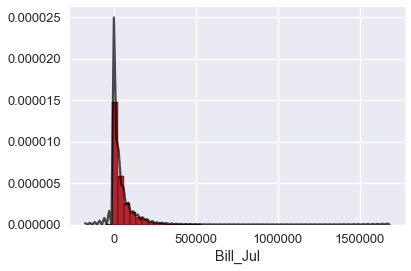

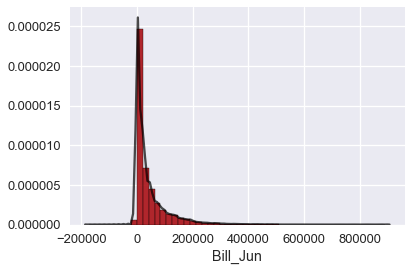

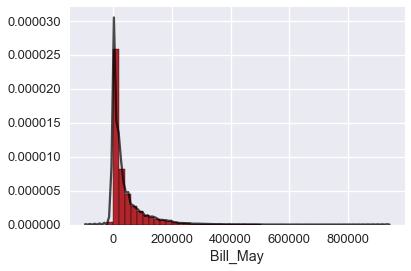

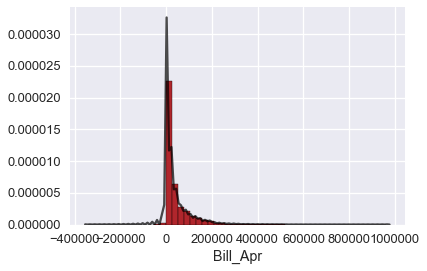

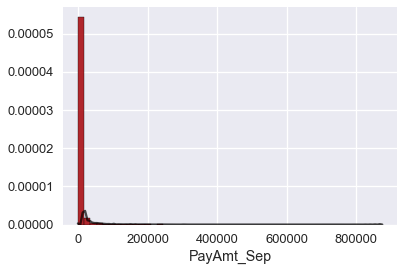

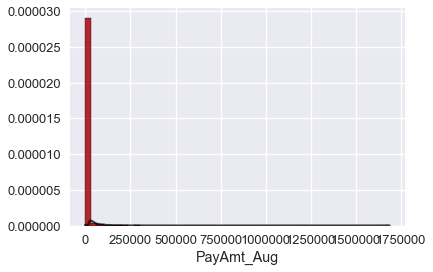

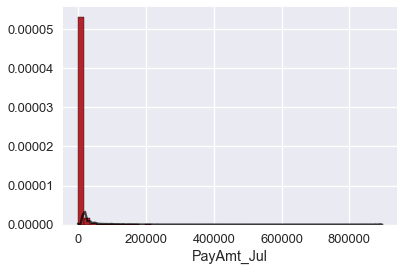

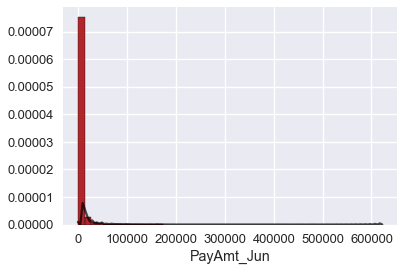

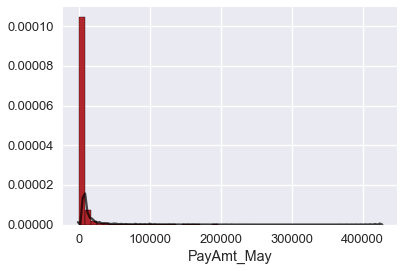

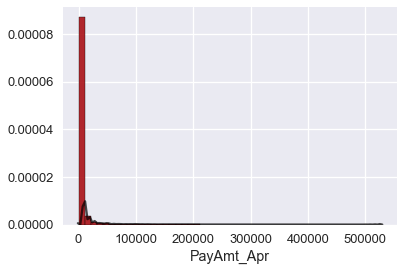

In [22]:
# Histograms for  continuous variables 
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Reds')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return plt.show()

for item in continuous:
    hist(data[item])

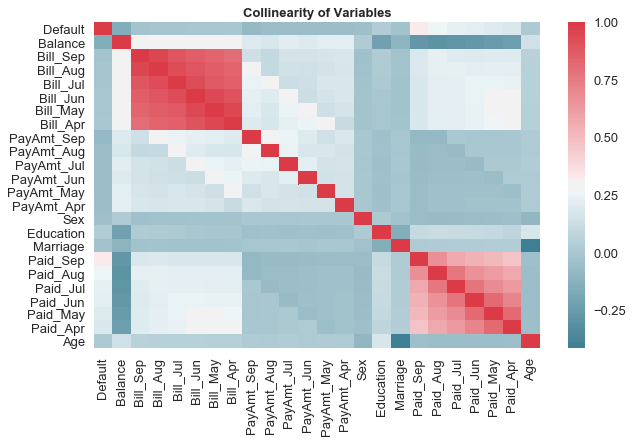

In [23]:
# Correlation matrix for all variables 
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns. diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[response+predictors].corr(), ax=ax, cmap=cmap)
ax.set_title('Collinearity of Variables', fontweight='bold', fontsize=13)
plt.show()

In [24]:
# List correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('Paid_Aug', 'Paid_Jul'),
 ('Paid_Jul', 'Paid_Jun'),
 ('Paid_Jun', 'Paid_May'),
 ('Paid_May', 'Paid_Apr'),
 ('Bill_Sep', 'Bill_Aug'),
 ('Bill_Sep', 'Bill_Jul'),
 ('Bill_Sep', 'Bill_Jun'),
 ('Bill_Sep', 'Bill_May'),
 ('Bill_Sep', 'Bill_Apr'),
 ('Bill_Aug', 'Bill_Jul'),
 ('Bill_Aug', 'Bill_Jun'),
 ('Bill_Aug', 'Bill_May'),
 ('Bill_Aug', 'Bill_Apr'),
 ('Bill_Jul', 'Bill_Jun'),
 ('Bill_Jul', 'Bill_May'),
 ('Bill_Jul', 'Bill_Apr'),
 ('Bill_Jun', 'Bill_May'),
 ('Bill_Jun', 'Bill_Apr'),
 ('Bill_May', 'Bill_Apr')]

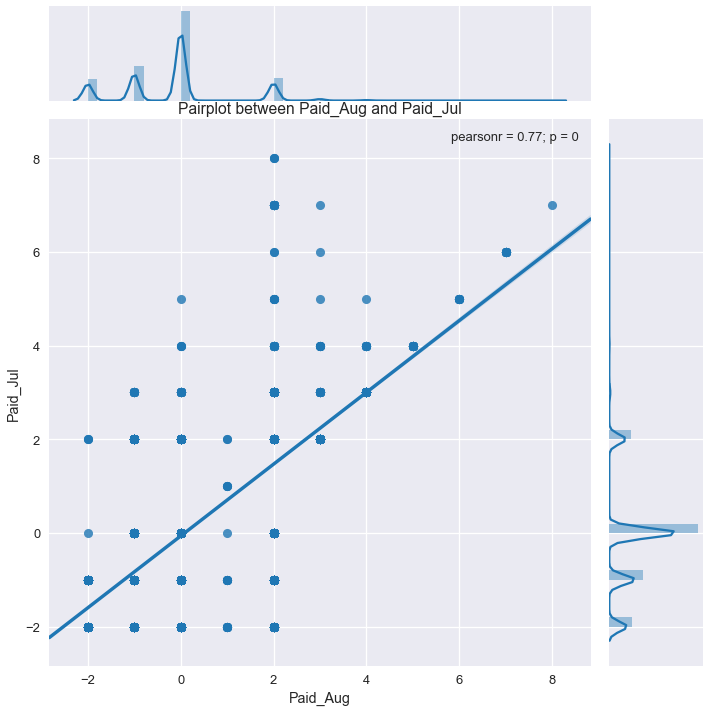

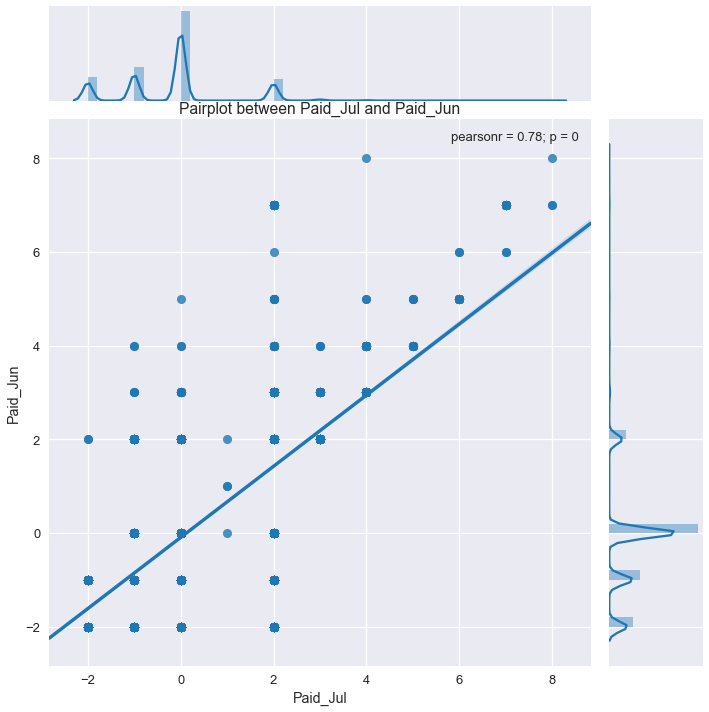

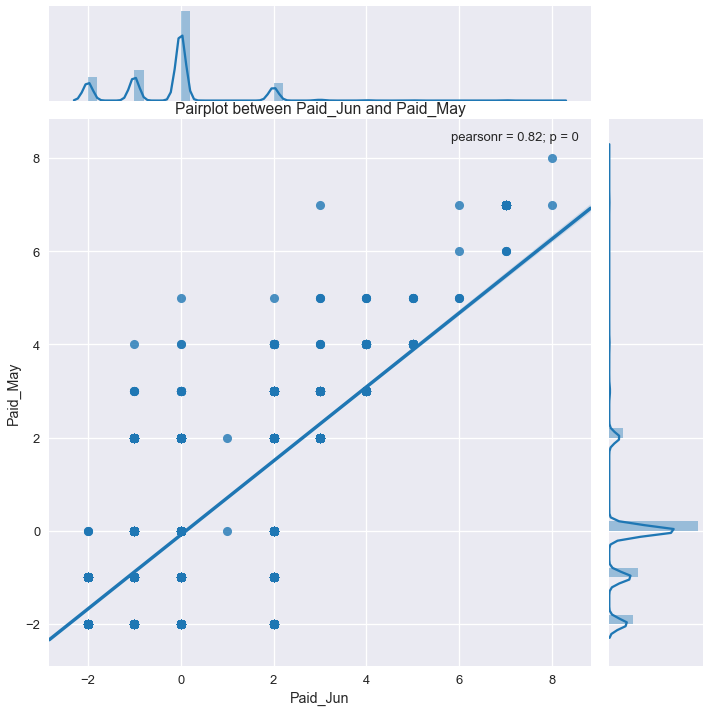

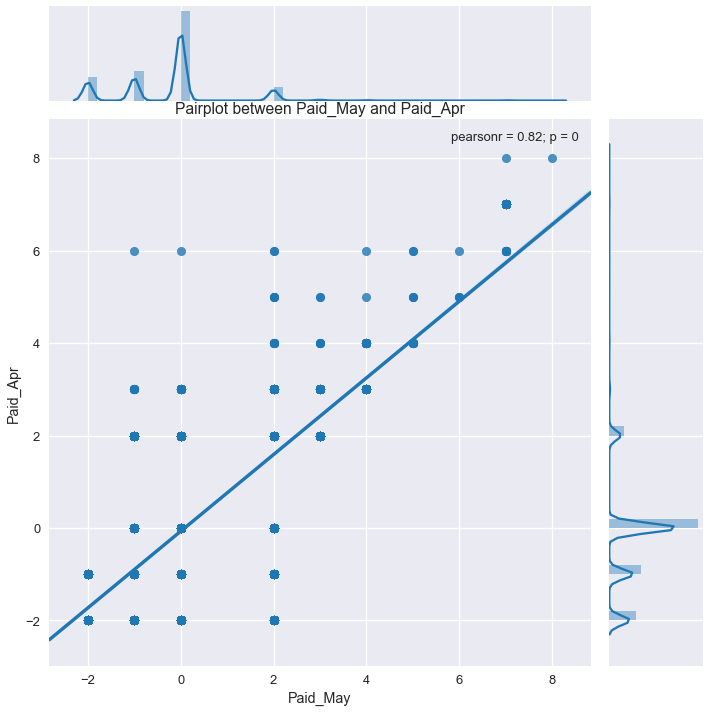

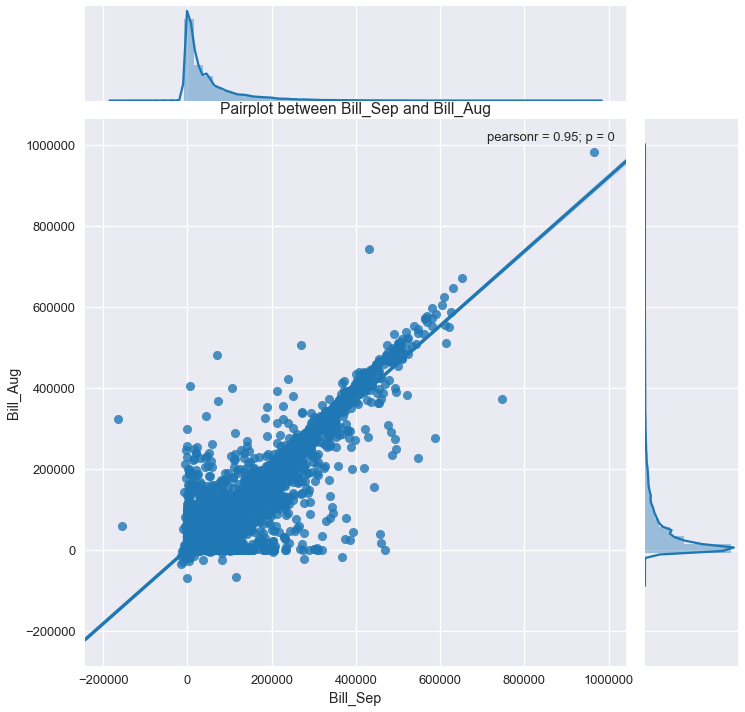

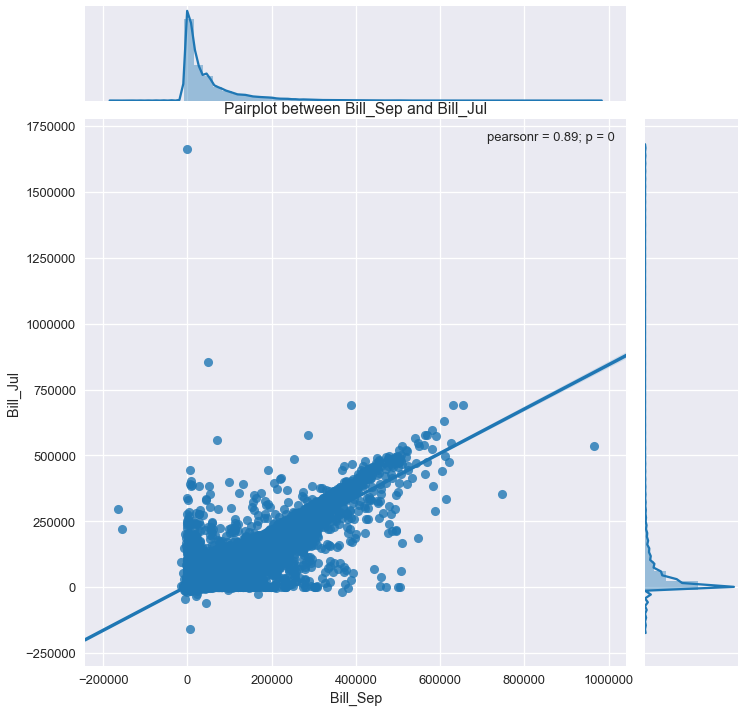

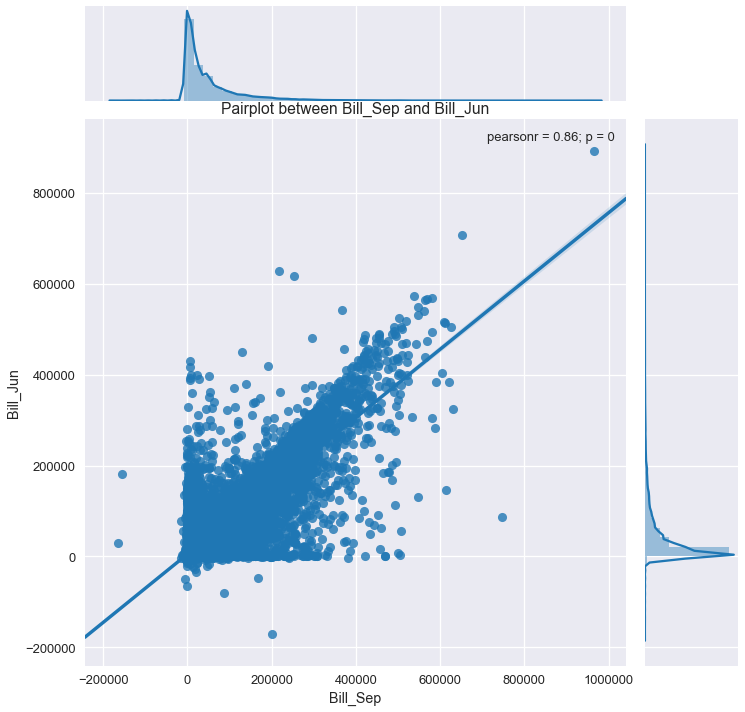

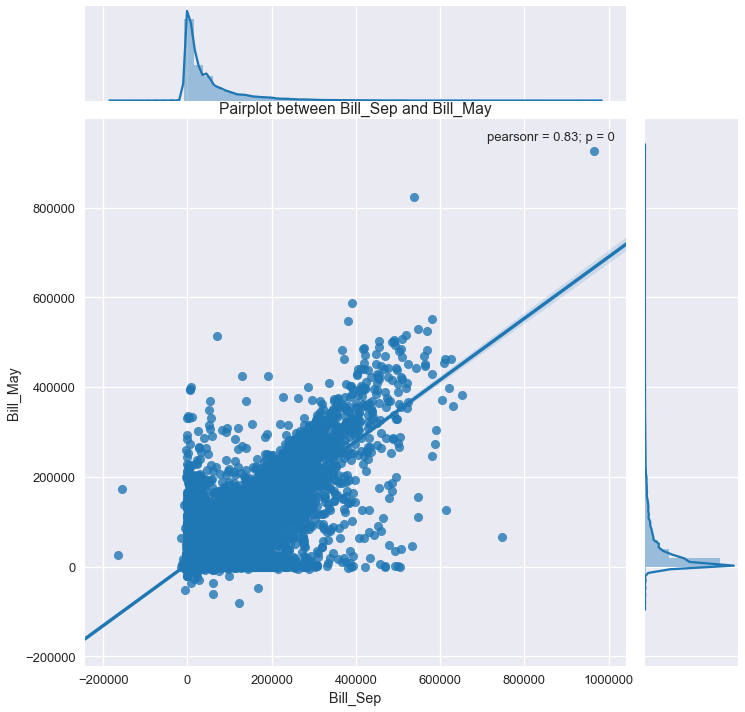

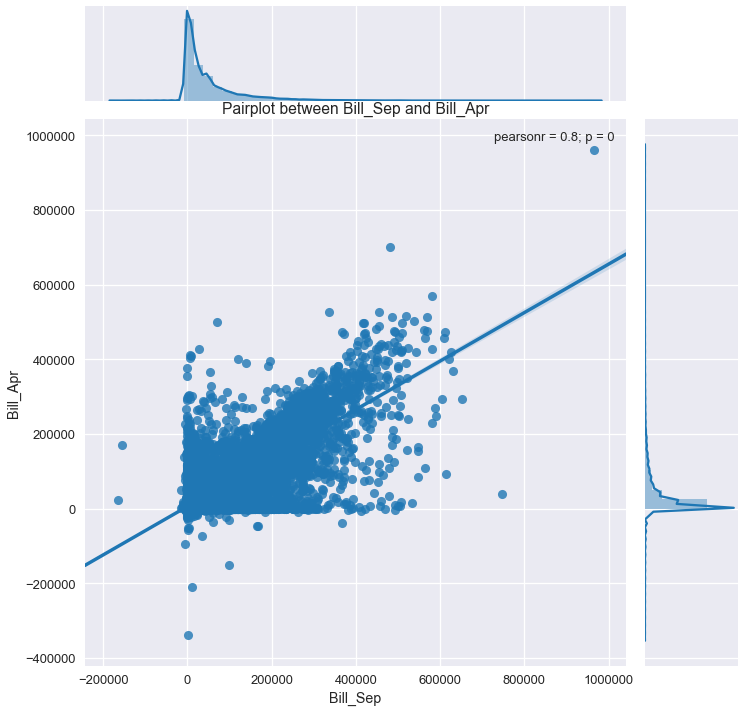

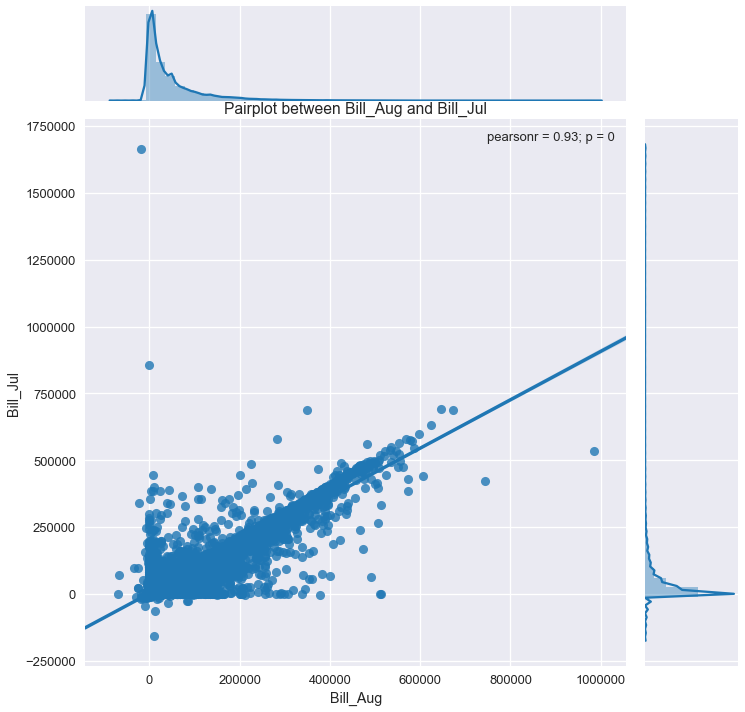

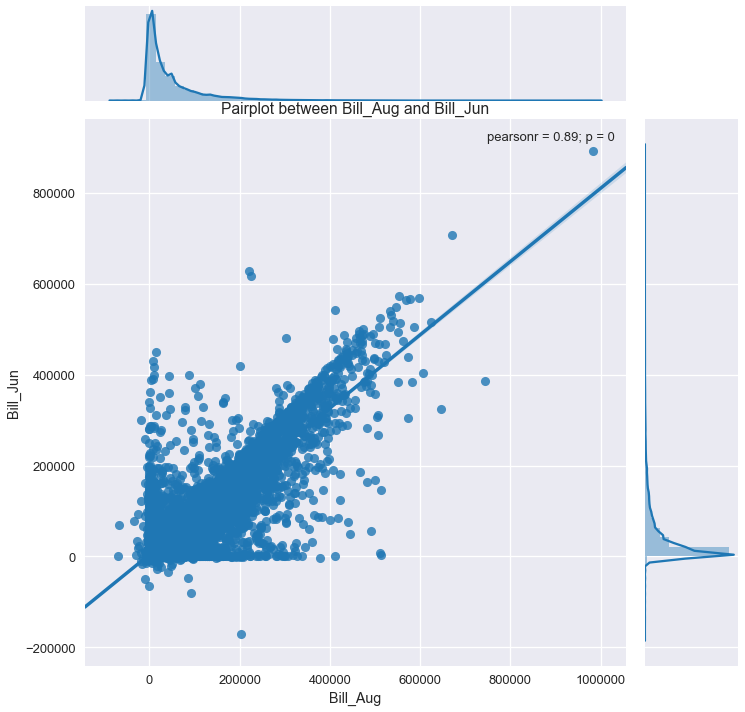

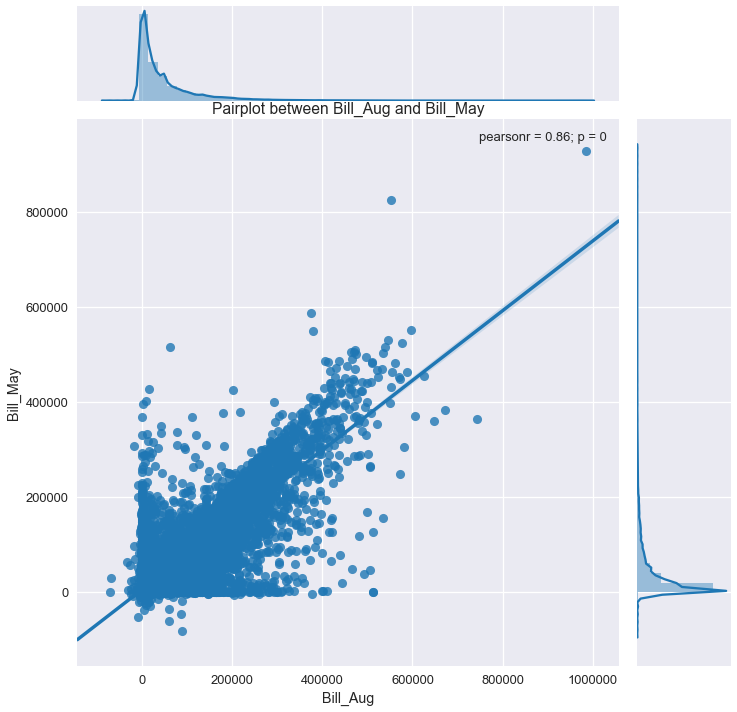

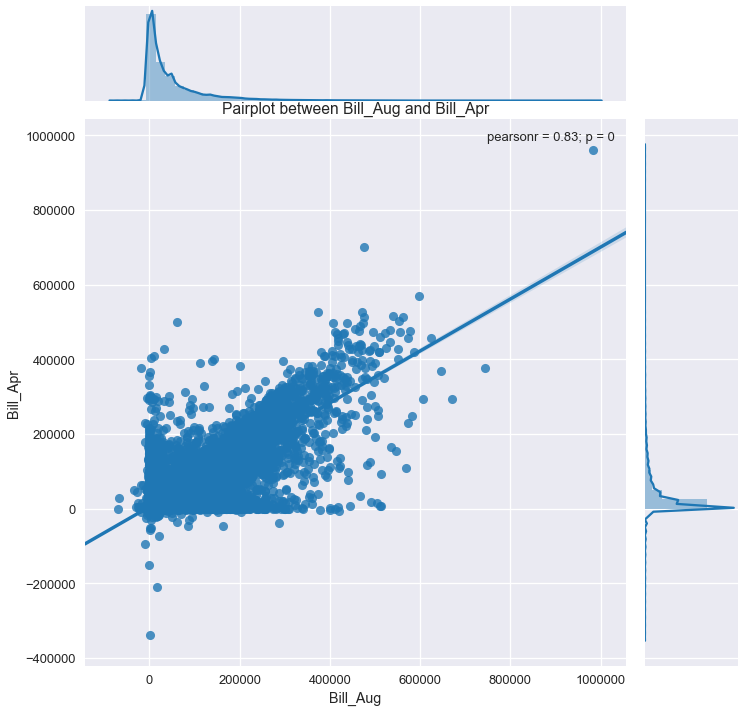

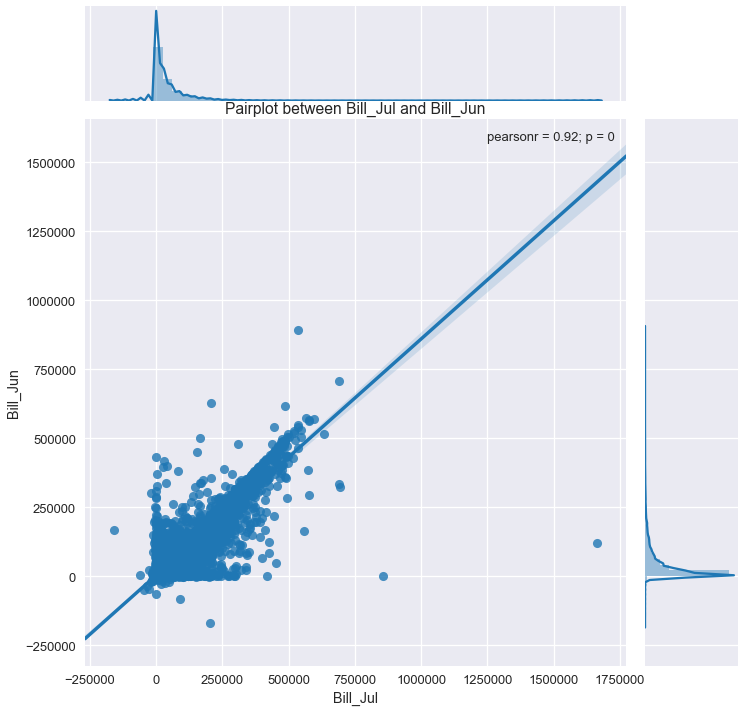

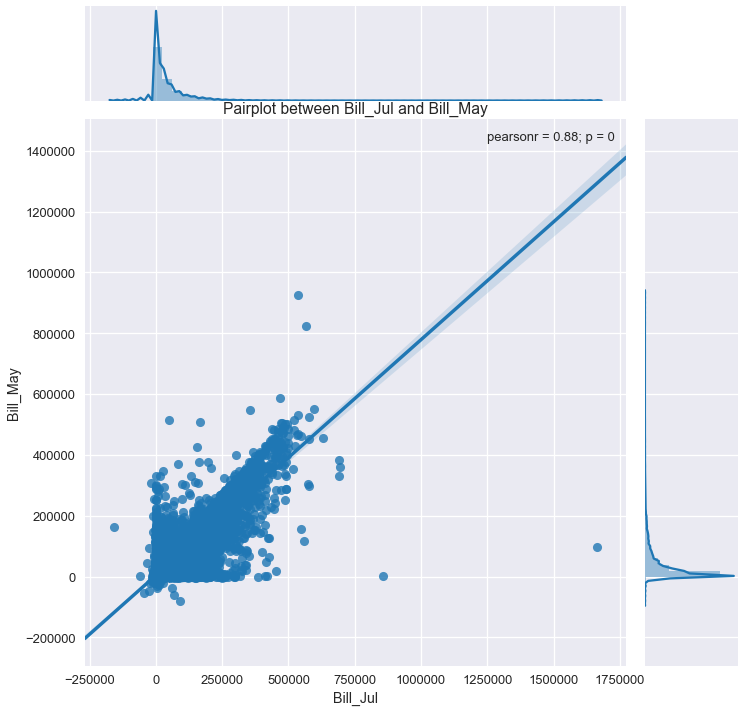

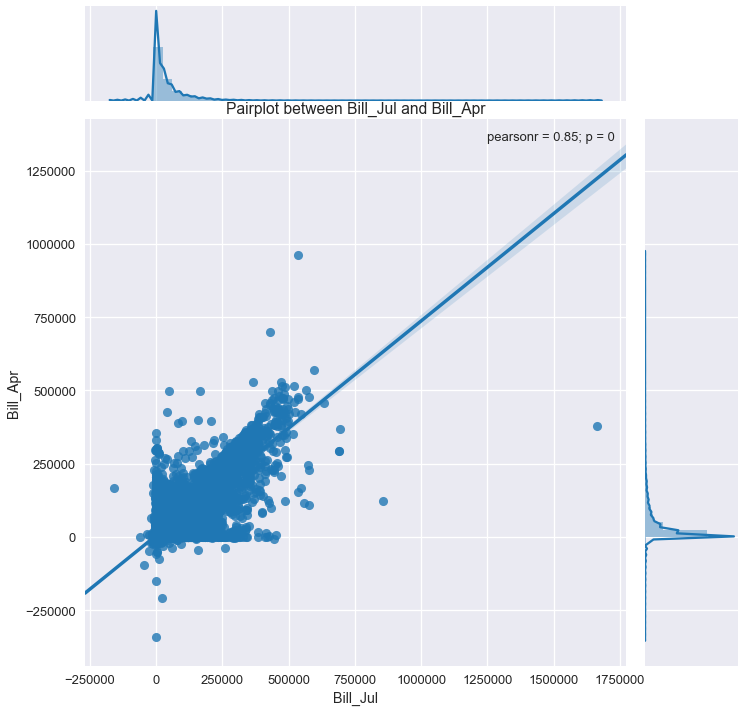

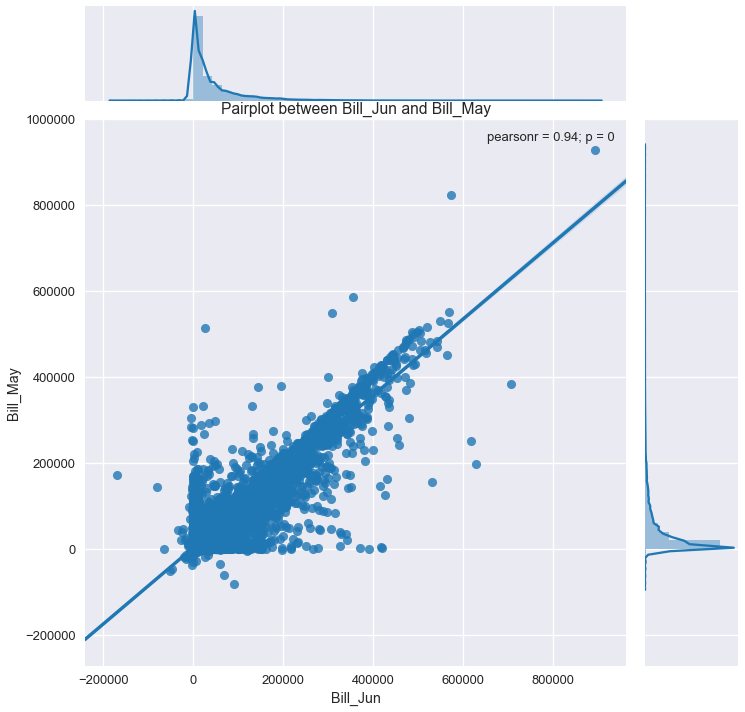

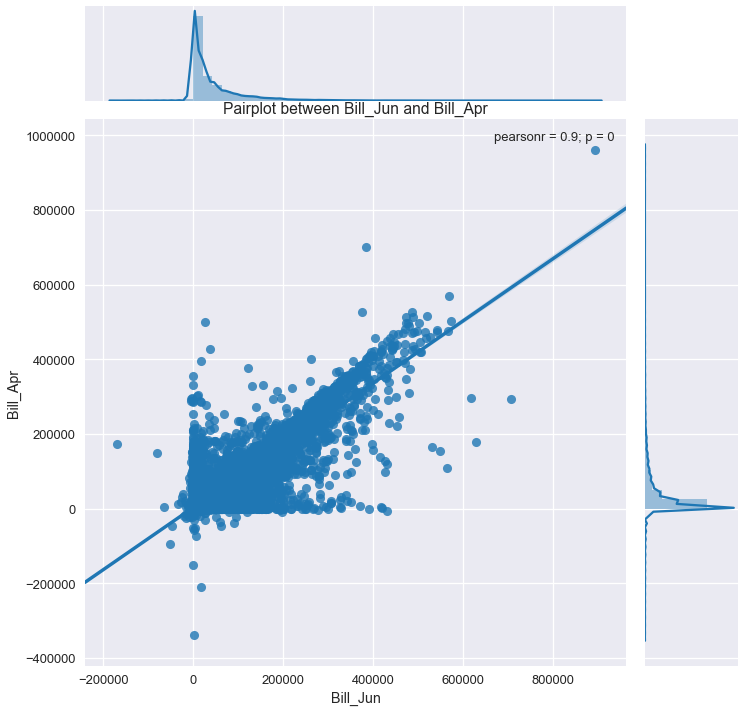

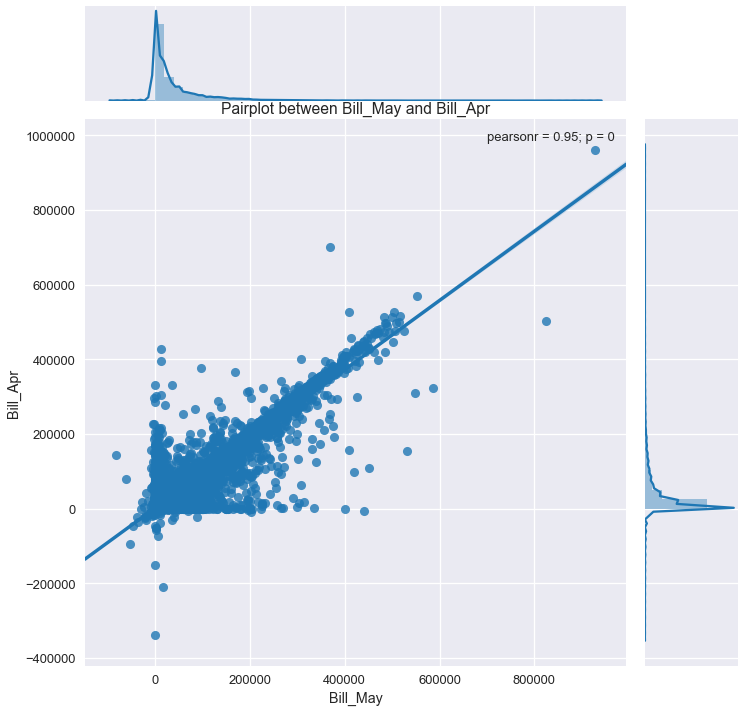

In [25]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

In [26]:
# Tests for skewness of data, to determine whether to scale with median or mean
from scipy.stats import skewtest
skewed = []
non_skewed = []

for i in continuous+discrete:
    p = skewtest(data[i], nan_policy='omit')[1] # calculates skewtest p_value (H0 = normally distributed)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)
        
print('Skewed variables are:\n{0}\n\nNon-skewed variables are:\n{1}'.format(skewed, non_skewed))

Skewed variables are:
['Balance', 'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr', 'Age']

Non-skewed variables are:
[]


Data all seems skewed, probably because of the zero-inflated data. 
Either transform with LOG or POWER

In [29]:
# Non-parametric Kruskal-Wallis ANOVA rank test - to determine class independence
from scipy.stats import kruskal
H = []
p = []

for i in categorical+discrete:
    h, pval = kruskal(*[data.loc[data[i]==v,'Default'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns=['H Stat'], index=categorical+discrete)
table['p values'] = pd.DataFrame(p, index=categorical+discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index=categorical+discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
Sex,47.90,0.0,True
Education,163.21,0.0,True
Marriage,35.66,0.0,True
Paid_Sep,5365.79,0.0,True
Paid_Aug,3474.35,0.0,True
Paid_Jul,2622.37,0.0,True
Paid_Jun,2341.39,0.0,True
Paid_May,2197.62,0.0,True
Paid_Apr,1886.77,0.0,True
Age,158.55,0.0,True


In [30]:
# Calculating VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
pred = continuous + discrete

X = data[pred].as_matrix()

VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, 
                   columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

,SQRT(VIF)
Bill_Aug,6.17
Bill_May,5.99
Bill_Jul,5.63
Bill_Jun,5.42
Bill_Apr,4.61
Bill_Sep,4.54
Balance,1.79
Age,1.66
PayAmt_Aug,1.54
PayAmt_Sep,1.37


In [48]:
# Cross-tabulation of Sex & Default
sex_default = pd.crosstab(data['Default'], data['Sex'], margins=True)

# Default
row = {0: 'Non-default', 1: 'Default', }
# Sex
column = {1: 'Male', 2: 'Female'}

sex_default.rename(index=row, columns=column, inplace=True)
sex_default

Sex,Male,Female,All
Default,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


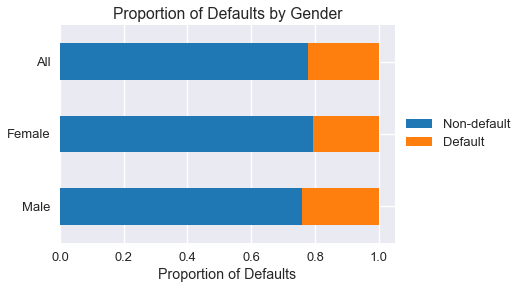

In [33]:
# Plot cross-tabulation
fig, ax = plt.subplots()

sex_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Gender')
plt.xlabel('Proportion of Defaults')
plt.show()

In [53]:
# Cross-tabulation of Education & Default
educ_default = pd.crosstab(data['Default'], data['Education'], margins=True)

# Default
row = {0: 'Non-default', 1: 'Default', }
# Education
column = {1: 'Graduate school', 2: 'University', 3: 'High school', 4: 'Others', 0: 'NA(0)', 5: 'NA(5)', 6: 'NA(6)'}

educ_default.rename(index=row, columns=column, inplace=True)
educ_default

Education,NA(0),Graduate school,University,High school,Others,NA(5),NA(6),All
Default,,,,,,,,
Non-default,14,8549,10700,3680,116,262,43,23364
Default,0,2036,3330,1237,7,18,8,6636
All,14,10585,14030,4917,123,280,51,30000


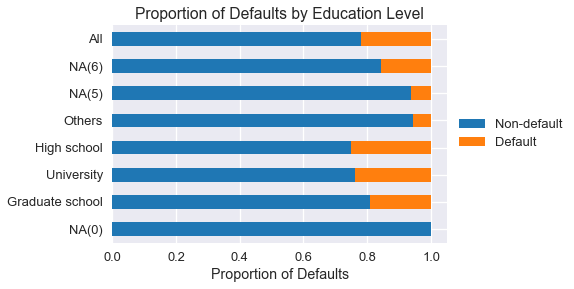

In [52]:
# Plot cross-tabulation
fig, ax = plt.subplots()

educ_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Education Level')
plt.xlabel('Proportion of Defaults')
plt.show()

In [54]:
# Cross-tabulation of Marriage & Default
marr_default = pd.crosstab(data['Default'], data['Marriage'], margins=True)

# Default
row = {0: 'Non-default', 1: 'Default', }
# Marriage 
column = {1: 'Married', 2: 'Single', 3: 'Others', 0: 'NA'}

marr_default.rename(index=row, columns=column, inplace=True)
marr_default

Marriage,NA,Married,Single,Others,All
Default,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


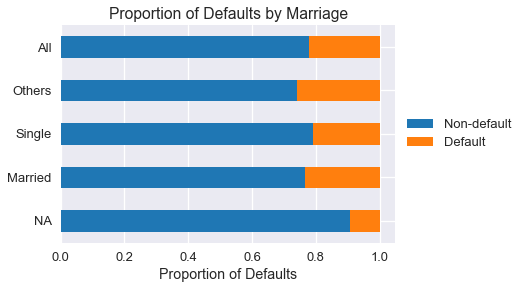

In [50]:
# Plot cross-tabulation
fig, ax = plt.subplots()

marr_default[0:2].T.plot.barh(stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Marriage')
plt.xlabel('Proportion of Defaults')
plt.show()

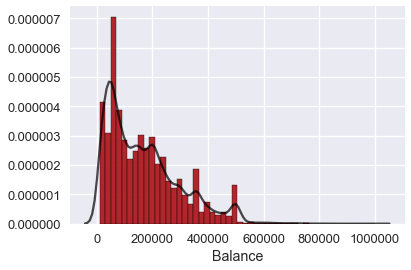

ValueError: Data must be positive.

In [62]:
import scipy
for i in continuous:
    scipy.stats.boxcox(data[i])[0]
    hist(data[i])
    
# Box Cox transformation won't work for negative values - figure this out later

In [ ]:
# POWER (MAYBE) and LOG (excluding) transformation 

In [ ]:
# Scale and split data, based on the mean and standard deviation of train dataset 
    # Logical because in theory do not know what the test dataset is 
def SplitScale():
    '''
    Splits the data into train and test, and scales
    '''

    # Step 1: Label response and predictors
    response = 'Default'
    predictors = [x for x in list(data.columns) if x not in response]
    
    # Step 2: Split data set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[[response]],
                                                        test_size=0.2, random_state=42)
    
    # Step 3: Prepare for scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(X_train)
    
    # Step 4: Scale the data
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

SplitScale()